Running Simulation
Seconds since epoch = 0.1617755889892578


/tmp/ipykernel_38070/3359275633.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Seconds since epoch = 0.9340753555297852
Seconds since epoch = 1.1685807704925537
Seconds since epoch = 1.481785535812378
Seconds since epoch = 1.6580219268798828
Seconds since epoch = 1.8455491065979004
Seconds since epoch = 2.025352716445923
Seconds since epoch = 2.490886688232422
Seconds since epoch = 3.273132562637329
Seconds since epoch = 3.742300271987915
Seconds since epoch = 3.962064027786255
Seconds since epoch = 4.3131749629974365
Seconds since epoch = 4.8102898597717285
Seconds since epoch = 5.050599575042725
Seconds since epoch = 5.220048666000366
Seconds since epoch = 5.491036415100098
Seconds since epoch = 5.751314640045166
Seconds since epoch = 5.990853548049927
Seconds since epoch = 6.19747257232666
Seconds since epoch = 6.555319786071777
Seconds since epoch = 6.821922063827515
Seconds since epoch = 7.000257968902588
Seconds since epoch = 7.227123975753784
Seconds since epoch = 7.647608518600464
Seconds since epoch = 8.016719102859497
Seconds since epoch = 8.23194146156

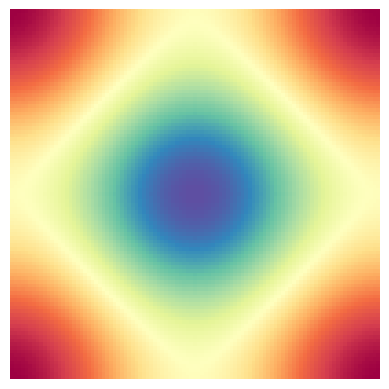

In [2]:
# Diffusion Cellular Automaton  
# Function: Describe the rate of diffusion via a convolutional function 
# via 3x3 laplacian matrix simulating diffusion in a main text matrix
# lapl = [[0, 0.25, 0], [0.25, -1, 0.25], [0, 0.25, 0]]
    # 0.25 is the rate of diffusion in each polar direction, simulating diffusion in a 2D matrix
    # -1 instead of 1 because we are exploring the change in the system with the lapl (convolution function)#

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio



#Preset matplotlib
%matplotlib inline

#list for saving image fules 
images = [] 

#Function for running diffusion simulation of predator matrix vs prey matrix via a laplacian convolutional function
def Diffuse(numIter, A, B, dt, dA, dB, lapl, plot_iter):
    print("Running Simulation")
    #Grab time stamp before 
    start = time.time()

    # Run the simulation
    for iter in range(numIter):
        #Convolution functions for predator and prey matrices
        A_new = A + (dA * signal.convolve2d(A, lapl, mode='same', boundary='fill', fillvalue=0)) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode='same', boundary='fill', fillvalue=0)) * dt
        #Update the matrices to A and B variable
        A = np.copy(A_new)
        B = np.copy(B_new)
        #If function to plot the diffusion of predator and prey matrices once the iteration is divisible by the plot_iter
        if (iter % plot_iter == 0):
            plt.clf()
            plt.imshow((B / (A+B)),cmap='Spectral')
            plt.axis('off')
            #Grab time stamp after plotting
            now = time.time()
            print("Seconds since epoch =", now-start)
            # plt.show()

            #Save the file to the dif_images file and append to the image file name to the image list 
            filename = 'dif_images/diffusion_'+str(iter)+'.png'
            plt.savefig(filename)
            images.append(imageio.imread(filename))
            #if statement to end image generation
            
    
    return A, B


# _*_*_*_*_*_*_*_*_* GRID PROPERTIES *_*_*_*_*_*_*_*_*_*
#Setting the grid properties for the simulation
grid_size = 101 # Needs to be odd for a symmetrical simulation
numIter = 10000;
seed_size = 11 # Needs to be odd for a symmetrical simulation
A = np.ones((grid_size,grid_size))
B = np.zeros((grid_size,grid_size))

# Seed the predators
B[int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1, \
int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1] = \
np.ones((seed_size,seed_size))


# _*_*_*_*_*_*_*_*_* SIMULATION VARIABLES *_*_*_*_*_*_*_*_*_*
dt = 1.0 # time step
dA = 0.5 # diffusion rate of predator
dB = 0.25 # diffusion rate of prey

# _*_*_*_*_*_*_*_*_* LAPLACIAN MATRIX *_*_*_*_*_*_*_*_*_*
# lapl is an array of arrays that feeds the convolutional function needed to assess the rate of diffusion in the system
#lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
lapl = np.array([[0, 0.25, 0], [0.25, -1, 0.25], [0, 0.25, 0]])

#Iteration of plots, essentially running plot section 50 times and then collecting the images to make a gif
plot_iter = 50

#Run the simulation
Diffuse(numIter, A, B, dt, dA, dB, lapl, plot_iter)
#Save the images to a gif
imageio.mimsave('dif_images/diffusion_movie.gif', images)
